# CNN Image Classification Laboration


Images used in this laboration are from CIFAR 10 (https://en.wikipedia.org/wiki/CIFAR-10). The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class. Your task is to make a classifier, using a convolutional neural network, that can correctly classify each image into the correct class.

You need to answer all questions in this notebook.

## Part 1: What is a convolution

To understand a bit more about convolutions, we will first test the convolution function in scipy using a number of classical filters.

Convolve the image with Gaussian filter, a Sobel X filter, and a Sobel Y filter, using the function 'convolve2d' in 'signal' from scipy.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

In a CNN, many filters are applied in each layer, and the filter coefficients are learned through back propagation (which is in contrast to traditional image processing, where the filters are designed by an expert).

In [ ]:
# This cell is finished

from scipy import signal
import numpy as np

# Get a test image
from scipy import misc
image = misc.ascent()

# Define a help function for creating a Gaussian filter
def matlab_style_gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

# Create Gaussian filter with certain size and standard deviation
gaussFilter = matlab_style_gauss2D((15,15),4)

# Define filter kernels for SobelX and Sobely
sobelX = np.array([[ 1, 0,  -1],
                    [2, 0, -2],
                    [1, 0, -1]])

sobelY = np.array([[ 1, 2,  1],
                    [0, 0, 0],
                    [-1, -2, -1]])

<ipython-input-1-f842718450cf>:8: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  image = misc.ascent()


In [ ]:
# Perform convolution using the function 'convolve2d' for the different filters
filterResponseGauss = signal.convolve2d(image,gaussFilter)
filterResponseSobelX = signal.convolve2d(image,sobelX)
filterResponseSobelY = signal.convolve2d(image,sobelY)

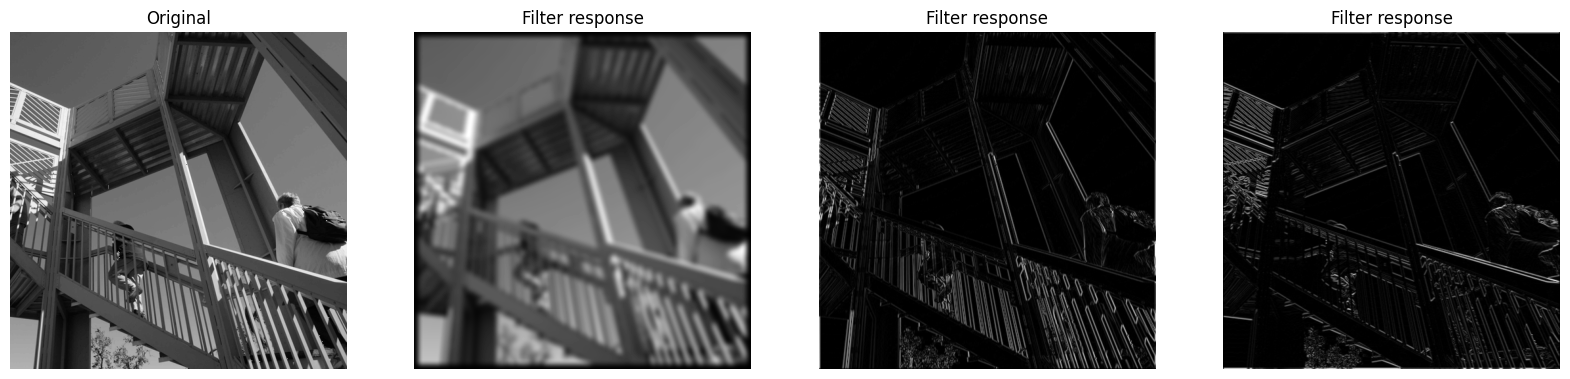

In [ ]:
import matplotlib.pyplot as plt

# Show filter responses
fig, (ax_orig, ax_filt1, ax_filt2, ax_filt3) = plt.subplots(1, 4, figsize=(20, 6))
ax_orig.imshow(image, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_filt1.imshow(np.absolute(filterResponseGauss), cmap='gray')
ax_filt1.set_title('Filter response')
ax_filt1.set_axis_off()
ax_filt2.imshow(np.absolute(filterResponseSobelX), cmap='gray')
ax_filt2.set_title('Filter response')
ax_filt2.set_axis_off()
ax_filt3.imshow(np.absolute(filterResponseSobelY), cmap='gray')
ax_filt3.set_title('Filter response')
ax_filt3.set_axis_off()

##  Part 2: Understanding convolutions

Question 1: What do the 3 different filters (Gaussian, SobelX, SobelY) do to the original image?

Gauss: Reduce noise and blur the image by averaging pixel values with the pixel neighborhood.

SobleX: Detect edges on the horizontal axes (x direction)

SobleY: Detect edges on the vertical axes (y direction)

Question 2: What is the size of the original image? How many channels does it have? How many channels does a color image normally have?

The image is 512x512 with 1 channel and a color image have 3 channels.

Question 3: What is the size of the different filters?

Gaussion is 15x15 the other two are 3x3.

Question 4: What is the size of the filter response if mode 'same' is used for the convolution ?

Inputsize + filtersize - 1.
512x512

Question 5: What is the size of the filter response if mode 'valid' is used for the convolution? How does the size of the valid filter response depend on the size of the filter?

The size of the filter response when using valid is input size - filtersize +1,
so for our gaussian its 512 - 15 + 1 X  512 - 15 + 1 = 498x498

So its quite clearly that if the filter is large, we will get a smaller filter response.

Question 6: Why are 'valid' convolutions a problem for CNNs with many layers?

As the image will shrink after each layer a deep CNN will reduce the dimension significantly, which then leads to information loss from the original image.


In [ ]:
# Your code for checking sizes of image and filter responses

print(image.shape) # sizes
print(filterResponseGauss.shape)
print(filterResponseSobelX.shape)
print(filterResponseSobelY.shape)
print(signal.convolve2d(image,gaussFilter,mode='same').shape)
print(signal.convolve2d(image,gaussFilter,mode='valid').shape)

(512, 512)
(526, 526)
(514, 514)
(514, 514)
(512, 512)
(498, 498)


##  Part 3: Get a graphics card

Skip this part if you run on a CPU (recommended)

Let's make sure that our script can see the graphics card that will be used. The graphics cards will perform all the time consuming convolutions in every training iteration.

In [ ]:
import os
import warnings

# Ignore FutureWarning from numpy
warnings.simplefilter(action='ignore', category=FutureWarning)

import keras.backend as K
import tensorflow as tf

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";

# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

# Allow growth of GPU memory, otherwise it will always look like all the memory is being used
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

##  Part 4: How fast is the graphics card?

Question 7: Why are the filters used for a color image of size 7 x 7 x 3, and not 7 x 7 ?

Each pixel is represented by 3 values, one for each color(blue,red,green) and to consider all colors the image need to have more dimensions.

Question 8: What operation is performed by the 'Conv2D' layer? Is it a standard 2D convolution, as performed by the function signal.convolve2d we just tested?

No its not exactly the same as convolve2d reverts the kernel and Conv2D does not! Other then that its the same calculations.

Question 9: Do you think that a graphics card, compared to the CPU, is equally faster for convolving a batch of 1,000 images, compared to convolving a batch of 3 images? Motivate your answer.

A batch of 1000 images is large and as GPUs are good at parallel processing to devide the calculations on across the cores which can speed up the calculations. CPUs othen have less cores and are not as efficient when it comes to parallelize task.

The bigger the task(1000 images vs 3), the bigger difference of the parallel processing will be seen. So we think the time difference between the GPU and CPU wont be linear.









##  Part 5:  Load data
Time to make a 2D CNN. Load the images and labels from keras.datasets, this cell is already finished.

In [ ]:
from keras.datasets import cifar10
import numpy as np

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Download CIFAR train and test data
(Xtrain, Ytrain), (Xtest, Ytest) = cifar10.load_data()

print("Training images have size {} and labels have size {} ".format(Xtrain.shape, Ytrain.shape))
print("Test images have size {} and labels have size {} \n ".format(Xtest.shape, Ytest.shape))

# Reduce the number of images for training and testing to 10000 and 2000 respectively,
# to reduce processing time for this laboration
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

Xtest = Xtest[0:2000]
Ytest = Ytest[0:2000]

Ytestint = Ytest

print("Reduced training images have size %s and labels have size %s " % (Xtrain.shape, Ytrain.shape))
print("Reduced test images have size %s and labels have size %s \n" % (Xtest.shape, Ytest.shape))

# Check that we have some training examples from each class
for i in range(10):
    print("Number of training examples for class {} is {}" .format(i,np.sum(Ytrain == i)))

Training images have size (50000, 32, 32, 3) and labels have size (50000, 1) 
Test images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
 
Reduced training images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
Reduced test images have size (2000, 32, 32, 3) and labels have size (2000, 1) 

Number of training examples for class 0 is 1005
Number of training examples for class 1 is 974
Number of training examples for class 2 is 1032
Number of training examples for class 3 is 1016
Number of training examples for class 4 is 999
Number of training examples for class 5 is 937
Number of training examples for class 6 is 1030
Number of training examples for class 7 is 1001
Number of training examples for class 8 is 1025
Number of training examples for class 9 is 981


##  Part 6: Plotting

Lets look at some of the training examples, this cell is already finished. You will see different examples every time you run the cell.

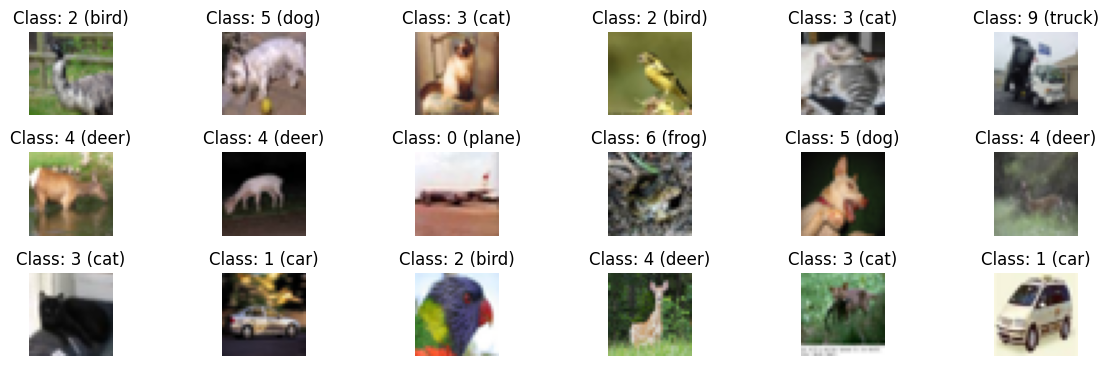

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
for i in range(18):
    idx = np.random.randint(7500)
    label = Ytrain[idx,0]

    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(Xtrain[idx])
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

##   Part 7: Split data into training, validation and testing
Split your training data into training (Xtrain, Ytrain) and validation (Xval, Yval), so that we have training, validation and test datasets (as in the previous laboration). We use a function in scikit learn. Use 25% of the data for validation.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split

# Your code for splitting the dataset
Xtrain,Xval,Ytrain,Yval = train_test_split(Xtrain,Ytrain, test_size=0.25)
# Print the size of training data, validation data and test data

print(Xtrain.shape)
print(Xval.shape)
print(Xtest.shape)

(7500, 32, 32, 3)
(2500, 32, 32, 3)
(2000, 32, 32, 3)


##  Part 8: Preprocessing of images

Lets perform some preprocessing. The images are stored as uint8, i.e. 8 bit unsigned integers, but need to be converted to 32 bit floats. We also make sure that the range is -1 to 1, instead of 0 - 255. This cell is already finished.

In [ ]:
# Convert datatype for Xtrain, Xval, Xtest, to float32
Xtrain = Xtrain.astype('float32')
Xval = Xval.astype('float32')
Xtest = Xtest.astype('float32')

# Change range of pixel values to [-1,1]
Xtrain = Xtrain / 127.5 - 1
Xval = Xval / 127.5 - 1
Xtest = Xtest / 127.5 - 1

##  Part 9: Preprocessing of labels

The labels (Y) need to be converted from e.g. '4' to "hot encoded", i.e. to a vector of type [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] . We use a function in Keras, see https://keras.io/api/utils/python_utils/#to_categorical-function

In [ ]:
from tensorflow.keras.utils import to_categorical

# Print shapes before converting the labels

print(Ytrain.shape)

# Your code for converting Ytrain, Yval, Ytest to categorical
Ytrain = to_categorical(Ytrain,10)
Yval = to_categorical(Yval,10)
Ytest = to_categorical(Ytest,10)
# Print shapes after converting the labels

print(Ytrain.shape)



(7500, 1)
(7500, 10)


##  Part 10: 2D CNN
Finish this code to create the image classifier, using a 2D CNN. Each convolutional layer will contain 2D convolution, batch normalization and max pooling. After the convolutional layers comes a flatten layer and a number of intermediate dense layers. The convolutional layers should take the number of filters as an argument, use a kernel size of 3 x 3, 'same' padding, and relu activation functions. The number of filters will double with each convolutional layer. The max pooling layers should have a pool size of 2 x 2. The intermediate dense layers before the final dense layer should take the number of nodes as an argument, use relu activation functions, and be followed by batch normalization. The final dense layer should have 10 nodes (= the number of classes in this laboration) and 'softmax' activation. Here we start with the Adam optimizer.

Relevant functions are

`model.add()`, adds a layer to the network

`Dense()`, a dense network layer

`Conv2D()`, performs 2D convolutions with a number of filters with a certain size (e.g. 3 x 3).

`BatchNormalization()`, perform batch normalization

`MaxPooling2D()`, saves the max for a given pool size, results in down sampling

`Flatten()`, flatten a multi-channel tensor into a long vector

`model.compile()`, compile the model, add " metrics=['accuracy'] " to print the classification accuracy during the training

See https://keras.io/api/layers/core_layers/dense/ and https://keras.io/api/layers/reshaping_layers/flatten/ for information on how the `Dense()` and `Flatten()` functions work

See https://keras.io/layers/convolutional/ for information on how `Conv2D()` works

See https://keras.io/layers/pooling/ for information on how `MaxPooling2D()` works

Import a relevant cost function for multi-class classification from keras.losses (https://keras.io/losses/) , it relates to how many classes you have.

See the following links for how to compile, train and evaluate the model

https://keras.io/api/models/model_training_apis/#compile-method

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy as cc

# Set seed from random number generator, for better comparisons
from numpy.random import seed
seed(123)

def build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=0, n_nodes=50, use_dropout=False, learning_rate=0.01):

    # Setup a sequential model
    model = Sequential()

    # Add first convolutional layer to the model, requires input shape

    model.add(Conv2D(filters=n_filters,kernel_size=(3,3), padding='same', activation='relu', input_shape=input_shape))

    # Add remaining convolutional layers to the model, the number of filters should increase a factor 2 for each layer
    for i in range(n_conv_layers-1):
      n_filters = n_filters * 2

      model.add(Conv2D(filters=n_filters,kernel_size=(3,3), padding='same', activation='relu'))

      model.add(BatchNormalization())
      model.add(MaxPooling2D(pool_size=(2, 2)))

      if use_dropout:
        model.add(Dropout(0.5))
    # Add flatten layer
    model.add(Flatten())

    # Add intermediate dense layers
    for i in range(n_dense_layers):
      model.add(Dense(n_nodes,activation='relu'))
      model.add(BatchNormalization())

    # Add final dense layer
    model.add(Dense(10,activation='softmax'))

    # Compile model
    model.compile(loss=cc(),optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'] )

    return model

In [ ]:
# Lets define a help function for plotting the training results
import matplotlib.pyplot as plt
def plot_results(history):

    loss = history.history['loss']
    acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()

## Part 11: Train 2D CNN

Time to train the 2D CNN, start with 2 convolutional layers, no intermediate dense layers, learning rate = 0.01. The first convolutional layer should have 16 filters (which means that the second convolutional layer will have 32 filters).

Relevant functions

`build_CNN`, the function we defined in Part 10, call it with the parameters you want to use

`model.fit()`, train the model with some training data

`model.evaluate()`, apply the trained model to some test data

See the following links for how to train and evaluate the model

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method

## 2 convolutional layers, no intermediate dense layers

In [ ]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain[0].shape # shape of 1 image

# Build model
model1 = build_CNN(input_shape, n_conv_layers=2, n_filters=16,learning_rate=0.01)


# Train the model  using training data and validation data
history1 = model1.fit(Xtrain,Ytrain,validation_data=(Xval,Yval),epochs =epochs, batch_size=batch_size)

Epoch 1/20
75/75 [==============================] - 5s 10ms/step - loss: 5.3450 - accuracy: 0.2709 - val_loss: 4.1434 - val_accuracy: 0.2532
Epoch 2/20
75/75 [==============================] - 0s 6ms/step - loss: 2.6191 - accuracy: 0.4028 - val_loss: 2.9818 - val_accuracy: 0.3192
Epoch 3/20
75/75 [==============================] - 1s 8ms/step - loss: 1.7768 - accuracy: 0.4805 - val_loss: 1.9174 - val_accuracy: 0.3716
Epoch 4/20
75/75 [==============================] - 1s 7ms/step - loss: 1.2301 - accuracy: 0.5780 - val_loss: 1.6967 - val_accuracy: 0.4160
Epoch 5/20
75/75 [==============================] - 1s 8ms/step - loss: 1.0404 - accuracy: 0.6315 - val_loss: 1.6716 - val_accuracy: 0.4240
Epoch 6/20
75/75 [==============================] - 0s 7ms/step - loss: 0.8856 - accuracy: 0.6945 - val_loss: 1.7452 - val_accuracy: 0.4308
Epoch 7/20
75/75 [==============================] - 0s 6ms/step - loss: 0.8025 - accuracy: 0.7200 - val_loss: 1.6052 - val_accuracy: 0.4736
Epoch 8/20
75/75 [=

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 10)                8

In [ ]:
# Evaluate the trained model on test set, not used in training or validation
score = model1.evaluate(Xtest,Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 0s 4ms/step - loss: 4.2192 - accuracy: 0.5120
Test loss: 4.2192
Test accuracy: 0.5120


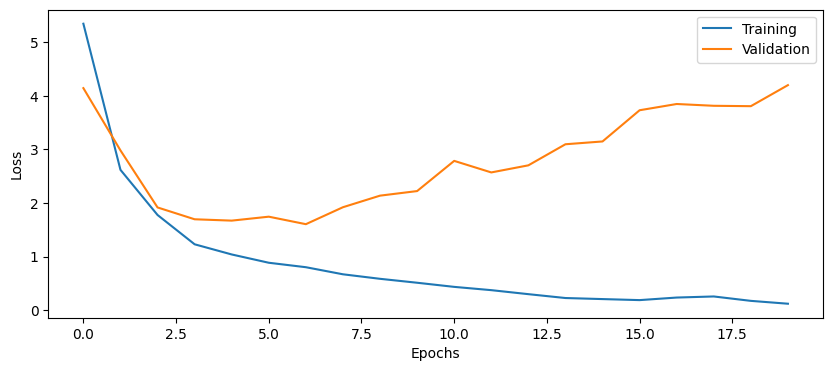

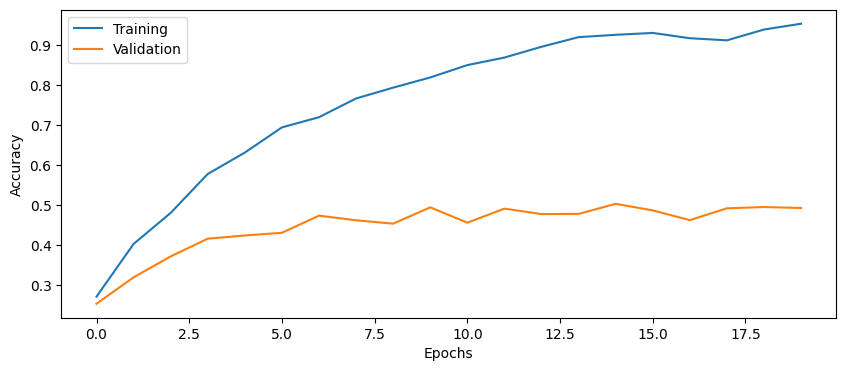

In [ ]:
# Plot the history from the training run
plot_results(history1)

## Part 12: Improving performance

Write down the test accuracy, are you satisfied with the classifier performance (random chance is 10%) ?

Question 10: How big is the difference between training and test accuracy?

Training accuracy is 90% and test accuracy is 49% resulting in a 41% units difference.

Question 11: For the DNN laboration we used a batch size of 10,000, why do we need to use a smaller batch size in this laboration?

Cause the data is composed of pixels and therefore has a way higher dimension. We're using a smaller batch size for better memory handling.

## 2 convolutional layers, 1 intermediate dense layer (50 nodes)

In [ ]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain[0].shape # shape of 1 image

# Build model
model2 = build_CNN(input_shape, n_conv_layers=2, n_filters=16,learning_rate=0.01, n_dense_layers = 1)

# Train the model  using training data and validation data
history2 = model2.fit(Xtrain,Ytrain,validation_data=(Xval,Yval),epochs =epochs, batch_size=batch_size)

Epoch 1/20
75/75 [==============================] - 4s 15ms/step - loss: 1.7753 - accuracy: 0.3735 - val_loss: 1.7712 - val_accuracy: 0.3648
Epoch 2/20
75/75 [==============================] - 1s 8ms/step - loss: 1.2763 - accuracy: 0.5416 - val_loss: 1.5754 - val_accuracy: 0.4248
Epoch 3/20
75/75 [==============================] - 0s 6ms/step - loss: 0.9724 - accuracy: 0.6603 - val_loss: 1.6106 - val_accuracy: 0.4392
Epoch 4/20
75/75 [==============================] - 0s 6ms/step - loss: 0.6660 - accuracy: 0.7704 - val_loss: 1.4977 - val_accuracy: 0.4980
Epoch 5/20
75/75 [==============================] - 0s 6ms/step - loss: 0.4327 - accuracy: 0.8513 - val_loss: 1.8511 - val_accuracy: 0.5020
Epoch 6/20
75/75 [==============================] - 0s 7ms/step - loss: 0.2466 - accuracy: 0.9195 - val_loss: 1.9936 - val_accuracy: 0.5140
Epoch 7/20
75/75 [==============================] - 1s 7ms/step - loss: 0.1532 - accuracy: 0.9533 - val_loss: 2.3853 - val_accuracy: 0.5364
Epoch 8/20
75/75 [=

In [ ]:
# Evaluate the trained model on test set, not used in training or validation
score = model2.evaluate(Xtest,Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 0s 3ms/step - loss: 3.3069 - accuracy: 0.5315
Test loss: 3.3069
Test accuracy: 0.5315


In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_1 (Dense)             (None, 50)               

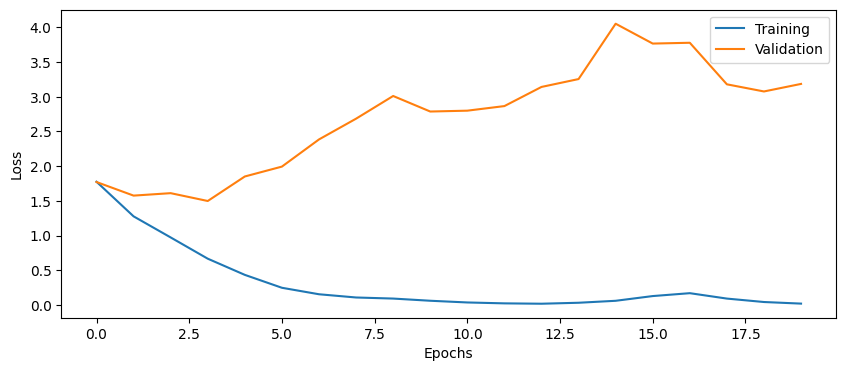

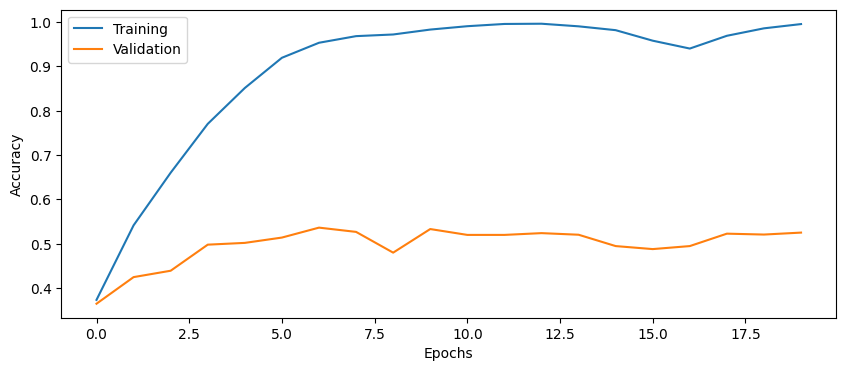

In [ ]:
# Plot the history from the training run
plot_results(history2)

## 4 convolutional layers, 1 intermediate dense layer (50 nodes)

In [ ]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain[0].shape

# Build model
model3 = build_CNN(input_shape, n_conv_layers=4, n_filters=16,learning_rate=0.01, n_dense_layers = 1)

# Train the model  using training data and validation data
history3 = model3.fit(Xtrain,Ytrain,validation_data=(Xval,Yval),epochs =epochs, batch_size=batch_size)

Epoch 1/20
75/75 [==============================] - 4s 17ms/step - loss: 1.7730 - accuracy: 0.3559 - val_loss: 1.7469 - val_accuracy: 0.3632
Epoch 2/20
75/75 [==============================] - 1s 11ms/step - loss: 1.3719 - accuracy: 0.5044 - val_loss: 1.4021 - val_accuracy: 0.5000
Epoch 3/20
75/75 [==============================] - 1s 9ms/step - loss: 1.1426 - accuracy: 0.5933 - val_loss: 1.3199 - val_accuracy: 0.5484
Epoch 4/20
75/75 [==============================] - 1s 9ms/step - loss: 0.9419 - accuracy: 0.6617 - val_loss: 1.3689 - val_accuracy: 0.5524
Epoch 5/20
75/75 [==============================] - 1s 9ms/step - loss: 0.7607 - accuracy: 0.7305 - val_loss: 2.0134 - val_accuracy: 0.4996
Epoch 6/20
75/75 [==============================] - 1s 8ms/step - loss: 0.6027 - accuracy: 0.7836 - val_loss: 1.4220 - val_accuracy: 0.5992
Epoch 7/20
75/75 [==============================] - 1s 10ms/step - loss: 0.4506 - accuracy: 0.8479 - val_loss: 1.8791 - val_accuracy: 0.5576
Epoch 8/20
75/75 

In [ ]:
# Evaluate the trained model on test set, not used in training or validation
score = model3.evaluate(Xtest,Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 5ms/step - loss: 2.2022 - accuracy: 0.6240
Test loss: 2.2022
Test accuracy: 0.6240


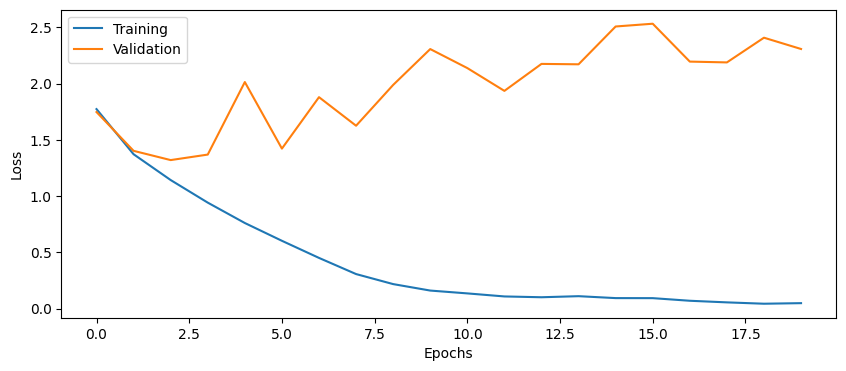

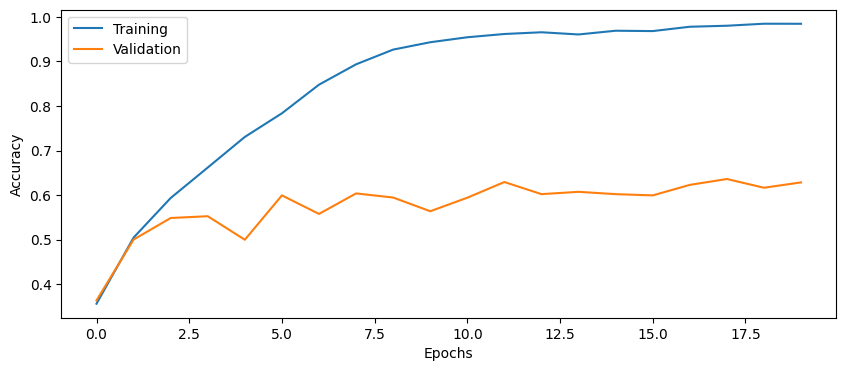

In [ ]:
# Plot the history from the training run
plot_results(history3)

##  Part 13: Plot the CNN architecture

To understand your network better, print the architecture using `model.summary()`

Question 12: How many trainable parameters does your network have? Which part of the network contains most of the parameters?

200948 trainable parameters. The part of the network that contains the most is the dense layer after the last convolution before the output layer.


Question 13: What is the input to and output of a Conv2D layer? What are the dimensions of the input and output?

The input to a Conv2D layer is convolved to a spatial dimensions that the kernel can traverse, the output is a tensor representing the information. It's represented as a 4D tensor on the form (batch size, height, width, filters/channels), which holds for both input and output. For input its called channels, for outputs its called filters.

For this model the first conv2d layer has the image shape as input and the other conv2d layers have the output of the previous conv2d layer as input.

The dimensions of the input and output are the same for each convolutional layer except for the filter which is multiplied by a factor of 2.

Question 14: Is the batch size always the first dimension of each 4D tensor? Check the documentation for Conv2D, https://keras.io/layers/convolutional/

Yes, according to the documentation the batch size is always first. What can differ is if you set data format from channels_last to channels_first, where it then goes from last to second place in the tensor.

Question 15: If a convolutional layer that contains 128 filters is applied to an input with 32 channels, what is the number of channels in the output?

The convolutional layer controls how many filters should be in the output, therefore the number of channels in the output will be 128.

Question 16: Why is the number of parameters in each Conv2D layer *not* equal to the number of filters times the number of filter coefficients per filter (plus biases)?

The number of parameters is the kernel size times the amount channels times the amount of filters + a bias for each filter. For our first Conv2D layer, this is (3x3) * 3 * 16 + 16 = 448.

Question 17: How does MaxPooling help in reducing the number of parameters to train?

Reducing the size of the output height and width reduces the size of the fully connected layer after the convolutions are done. The dense layer is calculated from the size of the output the pooling layer produces.

2048 * 50 = 102450.

In [ ]:
# Print network architecture

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 batch_normalization_3 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_4 (Bat  (None, 16, 16, 64)       

##  Part 14: Dropout regularization

Add dropout regularization between each intermediate dense layer, dropout probability 50%.

Question 18: How much did the test accuracy improve with dropout, compared to without dropout?

Question 19: What other types of regularization can be applied? How can you add L2 regularization for the convolutional layers?


## 4 convolutional layers, 1 intermediate dense layer (50 nodes), dropout

In [ ]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain[0].shape

# Build model
model4 = build_CNN(input_shape = input_shape, n_conv_layers=4, n_filters=16,n_dense_layers = 1, n_nodes = 50, use_dropout = True, learning_rate=0.01)

# Train the model  using training data and validation data
history4 = model4.fit(Xtrain,Ytrain,validation_data=(Xval,Yval),epochs =epochs, batch_size=batch_size)

Epoch 1/20
75/75 [==============================] - 5s 19ms/step - loss: 1.8843 - accuracy: 0.3228 - val_loss: 2.8597 - val_accuracy: 0.1684
Epoch 2/20
75/75 [==============================] - 1s 13ms/step - loss: 1.5827 - accuracy: 0.4219 - val_loss: 2.0865 - val_accuracy: 0.3016
Epoch 3/20
75/75 [==============================] - 1s 11ms/step - loss: 1.4548 - accuracy: 0.4644 - val_loss: 1.6474 - val_accuracy: 0.4140
Epoch 4/20
75/75 [==============================] - 1s 12ms/step - loss: 1.3590 - accuracy: 0.5055 - val_loss: 1.6728 - val_accuracy: 0.4216
Epoch 5/20
75/75 [==============================] - 1s 11ms/step - loss: 1.2747 - accuracy: 0.5381 - val_loss: 1.9790 - val_accuracy: 0.4760
Epoch 6/20
75/75 [==============================] - 1s 11ms/step - loss: 1.2290 - accuracy: 0.5517 - val_loss: 1.3726 - val_accuracy: 0.5292
Epoch 7/20
75/75 [==============================] - 1s 11ms/step - loss: 1.1564 - accuracy: 0.5785 - val_loss: 1.2271 - val_accuracy: 0.5748
Epoch 8/20
75

In [ ]:
# Evaluate the trained model on test set, not used in training or validation
score = model4.evaluate(Xtest,Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 0s 3ms/step - loss: 1.0138 - accuracy: 0.6635
Test loss: 1.0138
Test accuracy: 0.6635


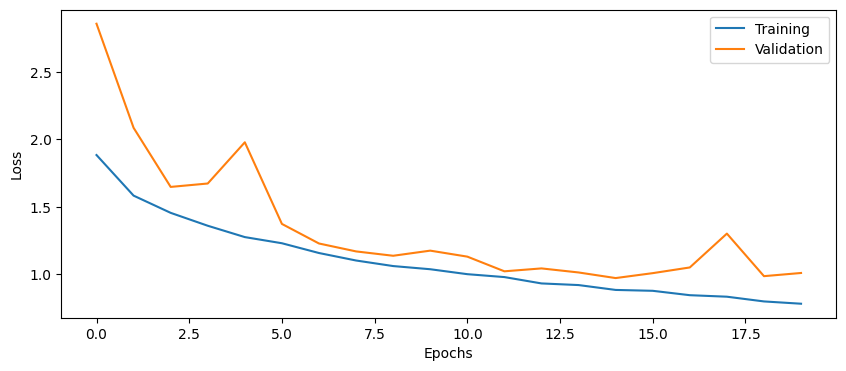

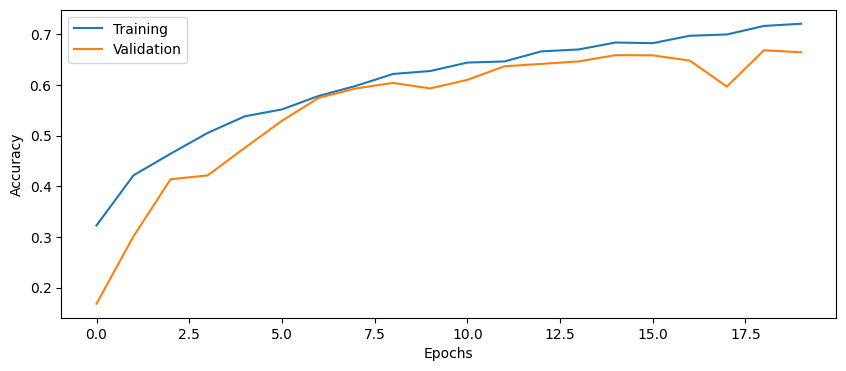

In [ ]:
# Plot the history from the training run
plot_results(history4)

Question 18: How much did the test accuracy improve with dropout, compared to without dropout?

- The test accuracy increased to about to 0.66 compared to 0.62 from the previously highest one. What's interesting with this is that the plots show there is probably more gain in further tying to optimize the model, as neither validation loss nor validation accuracu has really plateaued and still seems to be improving for every epoch.

Question 19: What other types of regularization can be applied? How can you add L2 regularization for the convolutional layers?

- L1 & L2 regularization is the main types of regularization that can be applied, along with Dropout. Adding L2 regularization is done by calling it when creating the Conv2d layer like so;

Conv2D(kernel_regularizer=regularizers.L2(x))

That particular line applies L2 regularization to the layer's kernel, but can also be extended to the bias, and output.

##  Part 15: Tweaking performance

You have now seen the basic building blocks of a 2D CNN. To further improve performance involves changing the number of convolutional layers, the number of filters per layer, the number of intermediate dense layers, the number of nodes in the intermediate dense layers, batch size, learning rate, number of epochs, etc. Spend some time (30 - 90 minutes) testing different settings.

Question 20: How high test accuracy can you obtain? What is your best configuration?

The highest test accuracy we managed to achieve was 0.699. The model architecture is built with 6 conv layers, 24 filter, 1 dense layer of 50 nodes and a learning rate of 0.01. The model is trained using a batch size of 75 and 25 epochs.

## Your best config

In [ ]:
# Setup some training parameters
batch_size = 75
epochs = 25
input_shape = Xtrain[0].shape

# Build model
model5 = build_CNN(input_shape = input_shape, n_conv_layers=6, n_filters=24, n_dense_layers = 1, n_nodes = 50, use_dropout = True, learning_rate=0.01)

# Train the model  using training data and validation data
history5 = model5.fit(Xtrain,Ytrain,validation_data=(Xval,Yval),epochs =epochs, batch_size=batch_size)

Epoch 1/25
100/100 [==============================] - 12s 26ms/step - loss: 2.0323 - accuracy: 0.2601 - val_loss: 2.1242 - val_accuracy: 0.3092
Epoch 2/25
100/100 [==============================] - 2s 20ms/step - loss: 1.6799 - accuracy: 0.3713 - val_loss: 1.8076 - val_accuracy: 0.3840
Epoch 3/25
100/100 [==============================] - 2s 20ms/step - loss: 1.5372 - accuracy: 0.4277 - val_loss: 1.8129 - val_accuracy: 0.4140
Epoch 4/25
100/100 [==============================] - 2s 21ms/step - loss: 1.4535 - accuracy: 0.4579 - val_loss: 1.5703 - val_accuracy: 0.4652
Epoch 5/25
100/100 [==============================] - 2s 21ms/step - loss: 1.3425 - accuracy: 0.5084 - val_loss: 1.3037 - val_accuracy: 0.5448
Epoch 6/25
100/100 [==============================] - 2s 23ms/step - loss: 1.2754 - accuracy: 0.5284 - val_loss: 1.2361 - val_accuracy: 0.5508
Epoch 7/25
100/100 [==============================] - 2s 20ms/step - loss: 1.2124 - accuracy: 0.5623 - val_loss: 1.2010 - val_accuracy: 0.579

In [ ]:
# Evaluate the trained model on test set, not used in training or validation
score = model5.evaluate(Xtest,Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 11ms/step - loss: 0.9046 - accuracy: 0.6990
Test loss: 0.9046
Test accuracy: 0.6990


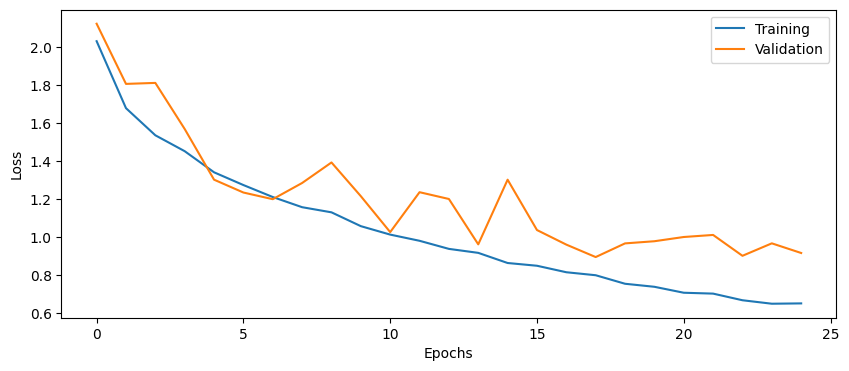

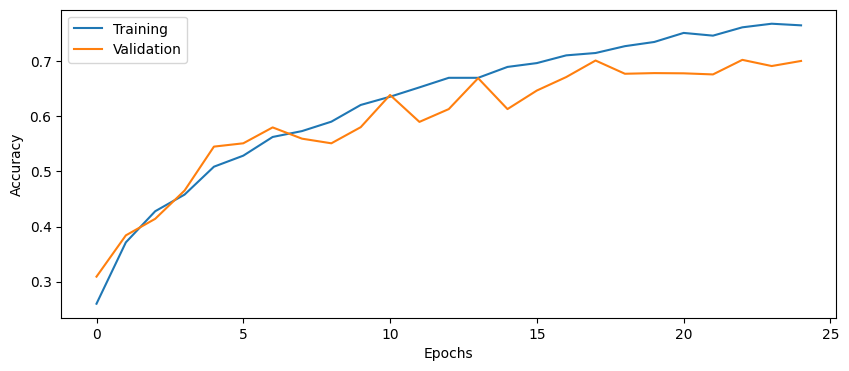

In [ ]:
# Plot the history from the training run
plot_results(history5)

##  Part 16: Rotate the test images

How high is the test accuracy if we rotate the test images? In other words, how good is the CNN at generalizing to rotated images?

Rotate each test image 90 degrees, the cells are already finished.

Question 21: What is the test accuracy for rotated test images, compared to test images without rotation? Explain the difference in accuracy.

The test accuracy for rotated images is 0.24. This is a very big difference, which inherents from the fact that all pictures are rotated. This means the model has no true characteristics to train on and thus can't recognize objects well.

In [ ]:
def myrotate(images):

    images_rot = np.rot90(images, axes=(1,2))

    return images_rot

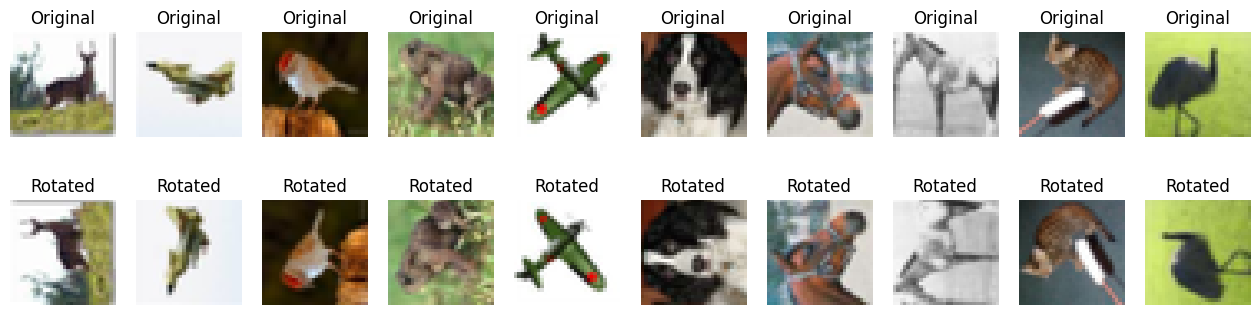

In [ ]:
# Rotate the test images 90 degrees
Xtest_rotated = myrotate(Xtest)

# Look at some rotated images
plt.figure(figsize=(16,4))
for i in range(10):
    idx = np.random.randint(500)

    plt.subplot(2,10,i+1)
    plt.imshow(Xtest[idx]/2+0.5)
    plt.title("Original")
    plt.axis('off')

    plt.subplot(2,10,i+11)
    plt.imshow(Xtest_rotated[idx]/2+0.5)
    plt.title("Rotated")
    plt.axis('off')
plt.show()


In [ ]:
# Evaluate the trained model on test set, not used in training or validation
score = model5.evaluate(Xtest_rotated,Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 0s 5ms/step - loss: 3.9930 - accuracy: 0.2225
Test loss: 3.9930
Test accuracy: 0.2225


##  Part 17: Augmentation using Keras `ImageDataGenerator`

We can increase the number of training images through data augmentation (we now ignore that CIFAR10 actually has 60 000 training images). Image augmentation is about creating similar images, by performing operations such as rotation, scaling, elastic deformations and flipping of existing images. This will prevent overfitting, especially if all the training images are in a certain orientation.

We will perform the augmentation on the fly, using a built-in function in Keras, called `ImageDataGenerator`

See https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator , the .flow(x,y) functionality

Make sure to use different subsets for training and validation when you setup the flows, otherwise you will validate on the same data...

In [ ]:
# Get all 60 000 training images again. ImageDataGenerator manages validation data on its own
(Xtrain, Ytrain), _ = cifar10.load_data()

# Reduce number of images to 10,000
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

# Change data type and rescale range
Xtrain = Xtrain.astype('float32')
Xtrain = Xtrain / 127.5 - 1

# Convert labels to hot encoding
Ytrain = to_categorical(Ytrain, 10)

In [ ]:
# Set up a data generator with on-the-fly data augmentation, 20% validation split
# Use a rotation range of 30 degrees, horizontal and vertical flipping
from keras.preprocessing.image import ImageDataGenerator


augmented = ImageDataGenerator(rotation_range = 0.3,
                               horizontal_flip = True,
                               vertical_flip = True,
                               validation_split = 0.2)

augmented.fit(Xtrain)

# Setup a flow for training data, assume that we can fit all images into CPU memory
augmented.flow(Xtrain, Ytrain, subset = "training", batch_size = Xtrain.shape[0])


# Setup a flow for validation data, assume that we can fit all images into CPU memory
augmented.flow(Xtrain, Ytrain, subset = "validation", batch_size = Xval.shape[0])


## Part 18: What about big data?

Question 22: How would you change the code for the image generator if you cannot fit all training images in CPU memory? What is the disadvantage of doing that change?

You would instead read the images in batches so as to have more memory available in CPU. The disadvantage is that it will take longer as you have to go through every step before training for each batch.

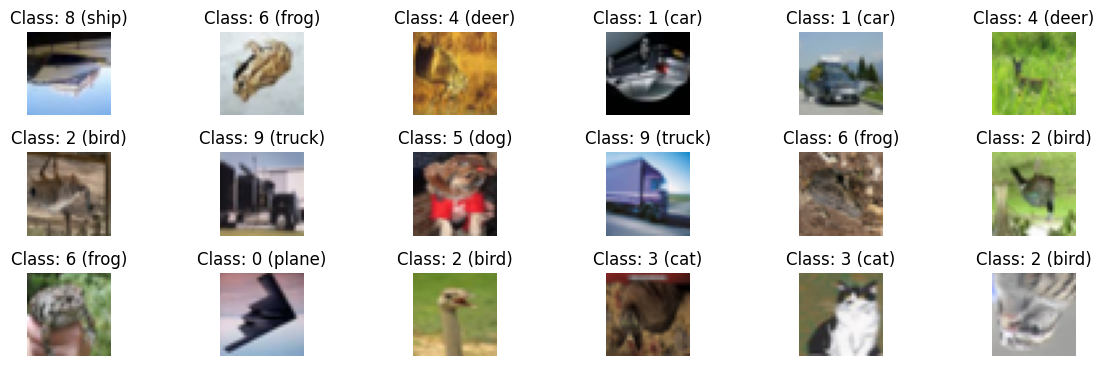

In [ ]:
# Plot some augmented images
plot_datagen = augmented.flow(Xtrain, Ytrain, batch_size=1)

plt.figure(figsize=(12,4))
for i in range(18):
    (im, label) = plot_datagen.next()
    im = (im[0] + 1) * 127.5
    im = im.astype('int')
    label = np.flatnonzero(label)[0]

    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

## Part 19: Train the CNN with images from the generator

See https://keras.io/api/models/model_training_apis/#fit-method for how to use model.fit with a generator instead of a fix dataset (numpy arrays)

To make the comparison fair to training without augmentation

    steps_per_epoch should be set to: len(Xtrain)*(1 - validation_split)/batch_size

    validation_steps should be set to: len(Xtrain)*validation_split/batch_size
    
This is required since with a generator, the fit function will not know how many examples your original dataset has.

Question 23: How quickly is the training accuracy increasing compared to without augmentation? Explain why there is a difference compared to without augmentation. We are here talking about the number of training epochs required to reach a certain accuracy, and not the training time in seconds. What parameter is necessary to change to perform more training?

The training accuracy is slower with the augmentation as we now get a more generalized data as the pictures of the same object "differs" more and it therefore takes more time to learn patterns etc.

The parameter we need to increase to train the model more is the number of epochs.


Question 24: What other types of image augmentation can be applied, compared to what we use here?

Here we use vertical flipping and horizontal rotation to augment images. Other ways to augment can be by mirroring, shifting brightness, channel shift intensity, shear & zoom.

In [ ]:
# Setup some training parameters
batch_size = 100
epochs = 200
input_shape = Xtrain[0].shape


# Build model (your best config)
model6 = build_CNN(input_shape = input_shape, n_conv_layers=6, n_filters=24, n_dense_layers = 1, n_nodes = 50, use_dropout = True, learning_rate=0.01)

validation_split=0.2
steps_per_epoch = len(Xtrain)*(1 - validation_split)/batch_size
validation_steps = len(Xtrain)*validation_split/batch_size
aug_train = augmented.flow(Xtrain, Ytrain, subset = "training", batch_size = batch_size)
aug_val = augmented.flow(Xtrain, Ytrain, subset = "validation", batch_size = batch_size )

# Train the model using on the fly augmentation
history6 = model6.fit(x=aug_train, validation_data= aug_val,
                      epochs =epochs, steps_per_epoch = steps_per_epoch, validation_steps = validation_steps)

Epoch 1/200
80/80 [==============================] - 10s 72ms/step - loss: 2.1481 - accuracy: 0.2126 - val_loss: 4.0368 - val_accuracy: 0.1525
Epoch 2/200
80/80 [==============================] - 6s 75ms/step - loss: 1.8405 - accuracy: 0.2925 - val_loss: 2.0370 - val_accuracy: 0.3080
Epoch 3/200
80/80 [==============================] - 5s 64ms/step - loss: 1.7172 - accuracy: 0.3537 - val_loss: 2.1883 - val_accuracy: 0.2395
Epoch 4/200
80/80 [==============================] - 7s 86ms/step - loss: 1.6323 - accuracy: 0.3845 - val_loss: 1.8918 - val_accuracy: 0.3225
Epoch 5/200
80/80 [==============================] - 5s 60ms/step - loss: 1.5661 - accuracy: 0.4069 - val_loss: 1.5959 - val_accuracy: 0.4220
Epoch 6/200
80/80 [==============================] - 7s 84ms/step - loss: 1.5261 - accuracy: 0.4285 - val_loss: 1.5333 - val_accuracy: 0.4435
Epoch 7/200
80/80 [==============================] - 5s 61ms/step - loss: 1.4782 - accuracy: 0.4462 - val_loss: 1.4788 - val_accuracy: 0.4695
Epoch

In [ ]:
# Check if there is still a big difference in accuracy for original and rotated test images

# Evaluate the trained model on original test set
score = model6.evaluate(Xtest, Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Evaluate the trained model on rotated test set
score = model6.evaluate(Xtest_rotated, Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

Test loss: 0.9846
Test accuracy: 0.7165
Test loss: 3.2796
Test accuracy: 0.3270


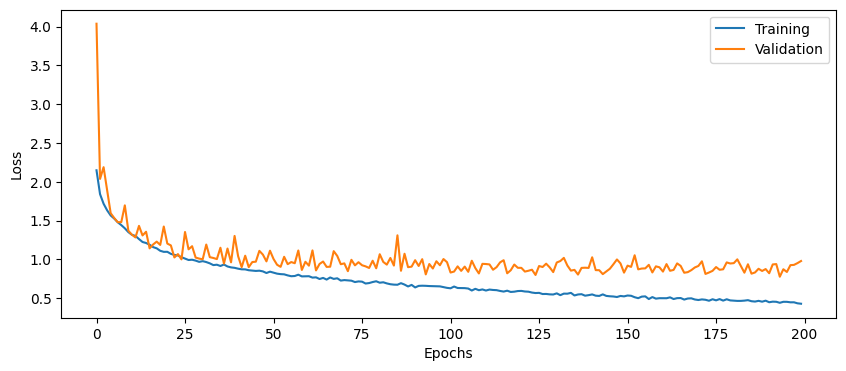

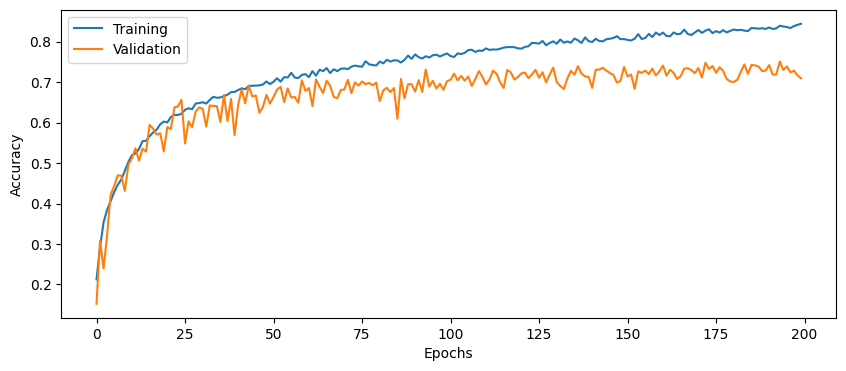

In [ ]:
# Plot the history from the training run
plot_results(history6)

## Part 20: Plot misclassified images

Lets plot some images where the CNN performed badly, these cells are already finished.

In [ ]:
# Find misclassified images
y_pred=model6.predict(Xtest)
y_pred=np.argmax(y_pred,axis=1)

y_correct = np.argmax(Ytest,axis=-1)

miss = np.flatnonzero(y_correct != y_pred)

63/63 [==============================] - 0s 4ms/step


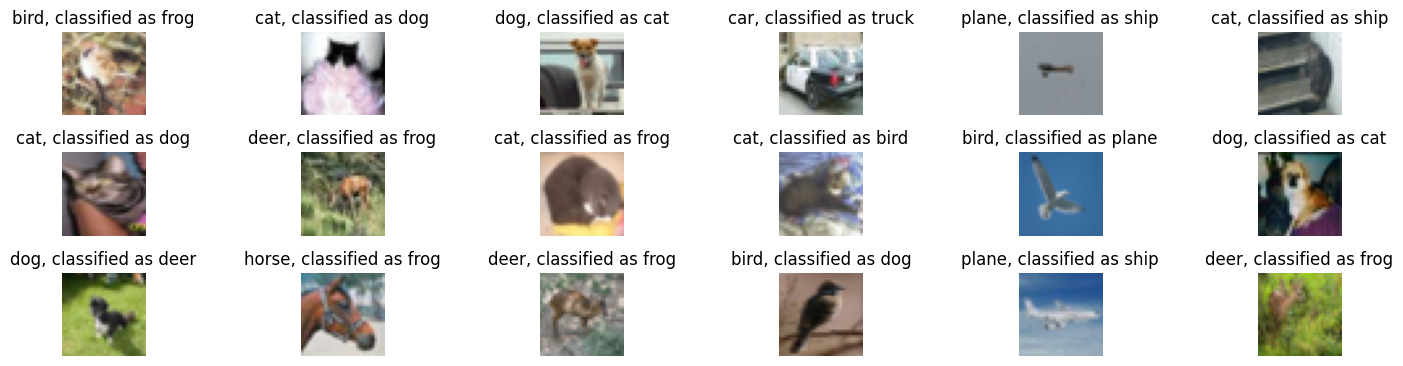

In [ ]:
# Plot a few of them
plt.figure(figsize=(15,4))
perm = np.random.permutation(miss)
for i in range(18):
    im = (Xtest[perm[i]] + 1) * 127.5
    im = im.astype('int')
    label_correct = y_correct[perm[i]]
    label_pred = y_pred[perm[i]]

    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.axis('off')
    plt.title("{}, classified as {}".format(classes[label_correct], classes[label_pred]))
plt.show()

##  Part 21: Testing on another size

Question 25: This CNN has been trained on 32 x 32 images, can it be applied to images of another size? If not, why is this the case?

No, it cant. Its because of the Dense layers as they are fully-connected and have a specific number of weights dependent on the size of the trained input. Another size of the image would lead to another number of weights and these havent been learned.

Pooling should also be affected by this as if we put in smaller images we might reduce the sizes of them too much.

Question 26: Is it possible to design a CNN that can be trained on images of one size, and then applied to an image of any size? How?

You can add a function that changes the size of the new images into the size your model have been trained on before it goes in to the first layer.  
It should also work to train a model with only CNN layers but you might not get a good result from doing this.

##  Part 22: Pre-trained 2D CNNs

There are many deep 2D CNNs that have been pre-trained using the large ImageNet database (several million images, 1000 classes). Import a pre-trained ResNet50 network from Keras applications. Show the network using `model.summary()`

Question 27: How many convolutional layers does ResNet50 have?

ResNet50 have 48 convolutional layers.

Question 28: How many trainable parameters does the ResNet50 network have?

25583592

Question 29: What is the size of the images that ResNet50 expects as input?

(224, 224, 3)  if include top is True.

Question 30: Using the answer to question 28, explain why the second derivative is seldom used when training deep networks.

Because the hessian matrix would be very large (25583592x25583592) and very computationally expensive.


Apply the pre-trained CNN to 5 random color images that you download and copy to the cloud machine or your own computer. Are the predictions correct? How certain is the network of each image class?

These pre-trained networks can be fine tuned to your specific data, and normally only the last layers need to be re-trained, but it will still be too time consuming to do in this laboration.

See https://keras.io/api/applications/ and https://keras.io/api/applications/resnet/#resnet50-function

Useful functions

`image.load_img` in tensorflow.keras.preprocessing

`image.img_to_array` in tensorflow.keras.preprocessing

`ResNet50` in tensorflow.keras.applications.resnet50

`preprocess_input` in tensorflow.keras.applications.resnet50

`decode_predictions` in tensorflow.keras.applications.resnet50

`expand_dims` in numpy


In [ ]:
# Your code for using pre-trained ResNet 50 on 5 color images of your choice.
# The preprocessing should transform the image to a size that is expected by the CNN.
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from numpy import expand_dims

# model
resnet = keras.applications.ResNet50()

resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
from google.colab import drive # connecting to drive to use be able to load pictures
drive.mount('/gdrive')
%cd /gdrive/MyDrive/Deep\ learning/DL-Liu/Lab2

Pictures to classify. Predictions are in ordering of the pictures.

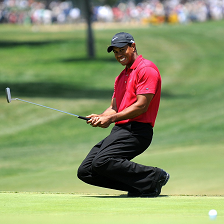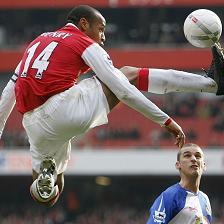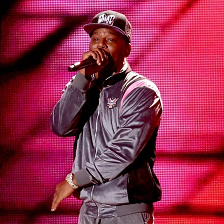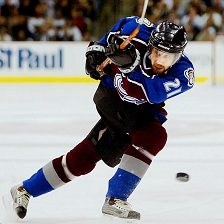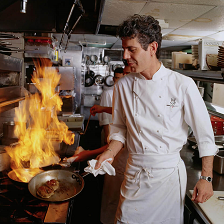

In [ ]:
woods = load_img("woods.png", target_size = (224,224))

img = img_to_array(woods)
img = expand_dims(img, axis=0)
img = preprocess_input(img)

pred = resnet.predict(img)

decode_predictions(pred)

1/1 [==============================] - 1s 857ms/step


[[('n09835506', 'ballplayer', 0.47083104),
  ('n02799071', 'baseball', 0.22884582),
  ('n04039381', 'racket', 0.1228365),
  ('n04067472', 'reel', 0.04737946),
  ('n03445777', 'golf_ball', 0.043180857)]]

In [ ]:
henry = load_img("henry.png", target_size = (224,224))

img = img_to_array(henry)
img = expand_dims(img, axis=0)
img = preprocess_input(img)

pred = resnet.predict(img)

decode_predictions(pred)

1/1 [==============================] - 0s 23ms/step


[[('n02799071', 'baseball', 0.46007013),
  ('n09835506', 'ballplayer', 0.2197292),
  ('n04540053', 'volleyball', 0.13384004),
  ('n02802426', 'basketball', 0.055605642),
  ('n04118538', 'rugby_ball', 0.05513315)]]

In [ ]:
camron = load_img("camron.png", target_size = (224,224))

img = img_to_array(camron)
img = expand_dims(img, axis=0)
img = preprocess_input(img)

pred = resnet.predict(img)

decode_predictions(pred)

1/1 [==============================] - 0s 55ms/step


[[('n04296562', 'stage', 0.4318847),
  ('n03494278', 'harmonica', 0.18928021),
  ('n03759954', 'microphone', 0.1730351),
  ('n04579432', 'whistle', 0.13116372),
  ('n02992529', 'cellular_telephone', 0.028033955)]]

In [ ]:
foppa = load_img("foppa.png", target_size = (224,224))

img = img_to_array(foppa)
img = expand_dims(img, axis=0)
img = preprocess_input(img)

pred = resnet.predict(img)

decode_predictions(pred)

1/1 [==============================] - 0s 20ms/step


[[('n04019541', 'puck', 0.9999716),
  ('n03623198', 'knee_pad', 1.5174914e-05),
  ('n03379051', 'football_helmet', 1.0211962e-05),
  ('n03127747', 'crash_helmet', 1.3874414e-06),
  ('n04228054', 'ski', 9.4153427e-07)]]

In [ ]:
bourdain = load_img("bourdain.png", target_size = (224,224))

img = img_to_array(bourdain)
img = expand_dims(img, axis=0)
img = preprocess_input(img)

pred = resnet.predict(img)

decode_predictions(pred)

1/1 [==============================] - 0s 45ms/step


[[('n04596742', 'wok', 0.97141063),
  ('n03259280', 'Dutch_oven', 0.0109677585),
  ('n04111531', 'rotisserie', 0.007572709),
  ('n03400231', 'frying_pan', 0.004732955),
  ('n02927161', 'butcher_shop', 0.0009598438)]]

Some pictures are hard for the model to classify, for the 3 first pictures the highest probability it has is slightly below 0.5. It classifies the golfplayer as a ballplayer and a very low probability of a golfball. For the actual ballplayer it's most sure of the football being a baseball. The rapper is not classified at all but it finds a stage and a microphone, somehow also a harmonica and cellphone. The last pictures it is very sure of it being a puck and a wok.